# Phonon magnitude analysis in theta-space
The dataset generated by `twist_ph.py` in theta-space mode is a matrix of phonon displacement vectors at a certain k-point over a sampled set of twist angles. This notebook shows a visualization of the magnitude of these vectors for each k-point.

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

In [2]:
# Change as necessary
KPT = 'Gamma'; th_min = 8.0; th_max = 10.0

In [3]:
# Import dataset from the directory
DIRNAME = "thspc"
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'/Users/jonathanlu/Documents/tmos2_2/{DIRNAME}/{KPT}/thspc_mags.npy'
poscars_uc = [Poscar.from_file(f'/Users/jonathanlu/Documents/tmos2_2/POSCAR_LAYER{i+1}') for i in range(2)]
dataset = np.load(path)
ntheta, nmodes, n_r = list(dataset.shape)[:-1]
print("Dataset shape:", dataset.shape)
print("Number of sampled twist angles:", ntheta)
print("Real space mesh size:", n_r)
print("Number of modes:", nmodes)
thetas = np.linspace(th_min, th_max, ntheta)

DMs = np.load(f'/Users/jonathanlu/Documents/tmos2_2/{DIRNAME}/{KPT}/dms.npy')
GM_set = np.load(f'/Users/jonathanlu/Documents/tmos2_2/{DIRNAME}/{KPT}/GM_set.npy')
k_set = np.load(f'/Users/jonathanlu/Documents/tmos2_2/{DIRNAME}/{KPT}/k_set.npy')
bl_M = np.load(f'/Users/jonathanlu/Documents/tmos2_2/{DIRNAME}/{KPT}/masses.npy')
mesh = np.load(f'/Users/jonathanlu/Documents/tmos2_2/{DIRNAME}/{KPT}/thspc_mesh.npy')
print(f"Mesh shape: {mesh.shape}")

Dataset shape: (5, 20, 1521, 3)
Number of sampled twist angles: 5
Real space mesh size: 1521
Number of modes: 20
Mesh shape: (5, 1521, 2)


Analyzing theta = 8.0 (idx=0)
Coords shape: (1521, 2)
Initializing twisted realspace phonon object...
Diagonalizing and sorting dynamical matrix at Gamma...
Diagonalized.
Transforming eigenmatrix into truncated Fourier phonon tensor...
Final evec shape for layer 0: (3, 7, 6, 3)
Final evec shape for layer 1: (3, 7, 6, 3)
Fourier phonon tensor constructed: shape (7, 6, 6, 3)
Signing and unitizing phonon modes...
Modes prepared.
Building realspace phonon tensor...(k=[0. 0.], |k| = 0.0)
Realspace phonon tensor built: shape (6, 6, 324, 3)
Twisted realspace phonon object initialized. Mode indices=[0 1 2 3 4 5]


<Figure size 432x288 with 0 Axes>

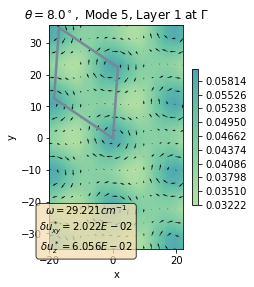

<Figure size 432x288 with 0 Axes>

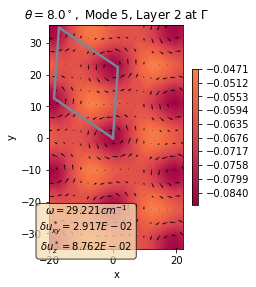

In [4]:
# Visualize the real-space phonons
THETA_IDX = 0
WHICH_MODE = 5
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]
print(f"Coords shape: {coords.shape}")

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], 6, 
                            bl_M, poscars_uc)
ph.plot_a_phonon(WHICH_MODE)

In [5]:
max_uz = np.max(dataset[:,:,:,-1], axis=2) # maximum displacement magnitude in z-direction
mean_uz = np.mean(dataset[:,:,:,-1], axis=2) # same but average
print(f"max_uz shape: {max_uz.shape}")

max_uz shape: (5, 20)


<Figure size 432x288 with 0 Axes>

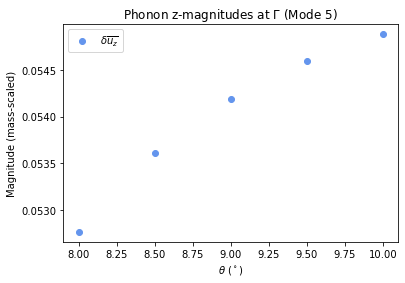

In [6]:
assert 0 <= WHICH_MODE < nmodes, "Invalid mode!"
plt.clf()
_, ax = plt.subplots()
ax.set_title(f"Phonon z-magnitudes at {log_name} (Mode {WHICH_MODE})")
ax.set_xlabel(r'$\theta$ ($^\circ$)')
ax.set_ylabel(r'Magnitude (mass-scaled)')
# ax.scatter(thetas, max_uz[:,WHICH_MODE], color='black', label=r'$\delta u_z^*$')
ax.scatter(thetas, mean_uz[:,WHICH_MODE], color='cornflowerblue', label=r'$\delta \overline{u_z}$')
ax.legend()
plt.show()


In [7]:
max_uz[-1]

array([0.02190447, 0.05054771, 0.00251579, 0.01014128, 0.01069685,
       0.06370493, 0.0842767 , 0.00275623, 0.1044034 , 0.10967755,
       0.09705943, 0.00980545, 0.10265863, 0.07613856, 0.07613856,
       0.12241859, 0.00321292, 0.0090087 , 0.00638949, 0.00383773])